In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Converting string representation of list to actual list (I prefer defining a function for this, but lambda works too)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
#Only wanna focus on data scientist jobs in the UK
df_UK = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg'])

df_UK


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1107,Data Scientist,"Data Scientist, Customer AI Engineering","London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-06-20 13:12:50,False,False,United Kingdom,year,157500.0,NaN,Tractable,"[python, numpy, pandas, scikit-learn]","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
9778,Senior Data Analyst,Workday HCM Senior Data Analyst (18 month FTC),"London, UK",via Ai-Jobs.net,Contractor,False,United Kingdom,2023-07-10 13:36:15,True,False,United Kingdom,year,111175.0,NaN,WPP,"[vba, python, r, oracle, sap, excel]","{'analyst_tools': ['sap', 'excel'], 'cloud': [..."
9903,Senior Data Engineer,Senior Satellite Analytics Data Engineer,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-08-10 13:34:53,False,False,United Kingdom,year,147500.0,NaN,Verisk,"[python, sql, nosql, mongodb, mongodb, elastic...","{'cloud': ['aws'], 'databases': ['mongodb', 'e..."
13764,Data Scientist,Programmatic Data Specialist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 13:22:50,False,False,United Kingdom,year,109500.0,NaN,Publicis Groupe,"[excel, powerpoint, flow]","{'analyst_tools': ['excel', 'powerpoint'], 'ot..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781461,Data Scientist,Data Scientist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-04-04 06:31:10,False,False,United Kingdom,year,88128.0,NaN,Kuda Technologies Ltd,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
783284,Senior Data Scientist,Senior Data Scientist,"Belfast, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-28 06:14:36,False,False,United Kingdom,year,157500.0,NaN,Axiom,"[sql, r, python, aws, redshift, spark, gitlab,...","{'async': ['jira', 'confluence'], 'cloud': ['a..."
783436,Data Scientist,Insight Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 06:36:08,True,False,United Kingdom,year,72900.0,NaN,Xiatech,"[html, python, css, javascript, sql, bigquery,...","{'analyst_tools': ['tableau'], 'async': ['jira..."
783598,Data Engineer,Data Engineer,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-02 06:18:42,False,False,United Kingdom,year,96773.0,NaN,Prevail,"[python, java, scala, c#, r, redshift, aws]","{'cloud': ['redshift', 'aws'], 'programming': ..."


In [24]:
job_titles = df_UK['job_title_short'].value_counts().index[:3].to_list()

job_titles

['Data Scientist', 'Data Analyst', 'Data Engineer']

In [25]:
df_UK_top_jobs = df_UK[df_UK['job_title_short'].isin(job_titles)]

In [26]:
df_UK_top_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1107,Data Scientist,"Data Scientist, Customer AI Engineering","London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-06-20 13:12:50,False,False,United Kingdom,year,157500.0,NaN,Tractable,"[python, numpy, pandas, scikit-learn]","{'libraries': ['numpy', 'pandas', 'scikit-lear..."
2602,Data Analyst,Admin & Data Analyst,United Kingdom,via Ai-Jobs.net,Full-time,False,United Kingdom,2023-02-10 13:55:49,False,False,United Kingdom,year,51014.0,NaN,Catch22,"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
13764,Data Scientist,Programmatic Data Specialist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 13:22:50,False,False,United Kingdom,year,109500.0,NaN,Publicis Groupe,"[excel, powerpoint, flow]","{'analyst_tools': ['excel', 'powerpoint'], 'ot..."
16526,Data Analyst,Portfolio Data Feeds - Associate Portfolio Dat...,"Edinburgh, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-24 13:11:25,False,False,United Kingdom,year,100500.0,NaN,Addepar,"[sql, jupyter]","{'libraries': ['jupyter'], 'programming': ['sq..."
20017,Data Scientist,Content Manager with ML/Data Science Experience,Anywhere,via AngelList,Contractor,True,United Kingdom,2023-02-27 13:14:54,False,False,United Kingdom,year,60000.0,NaN,Neurons Lab,[aws],{'cloud': ['aws']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779031,Data Scientist,Data Science Team Lead,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-08-31 05:22:00,False,False,United Kingdom,year,89100.0,NaN,GWI,"[python, julia, express, trello, jira]","{'async': ['trello', 'jira'], 'programming': [..."
781461,Data Scientist,Data Scientist,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-04-04 06:31:10,False,False,United Kingdom,year,88128.0,NaN,Kuda Technologies Ltd,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
783436,Data Scientist,Insight Analyst,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-07-11 06:36:08,True,False,United Kingdom,year,72900.0,NaN,Xiatech,"[html, python, css, javascript, sql, bigquery,...","{'analyst_tools': ['tableau'], 'async': ['jira..."
783598,Data Engineer,Data Engineer,"London, UK",via Ai-Jobs.net,Full-time,False,United Kingdom,2023-05-02 06:18:42,False,False,United Kingdom,year,96773.0,NaN,Prevail,"[python, java, scala, c#, r, redshift, aws]","{'cloud': ['redshift', 'aws'], 'programming': ..."


/var/folders/l0/k4x186gj0bb144vhk6pmyc3c0000gn/T/ipykernel_58824/3398448925.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


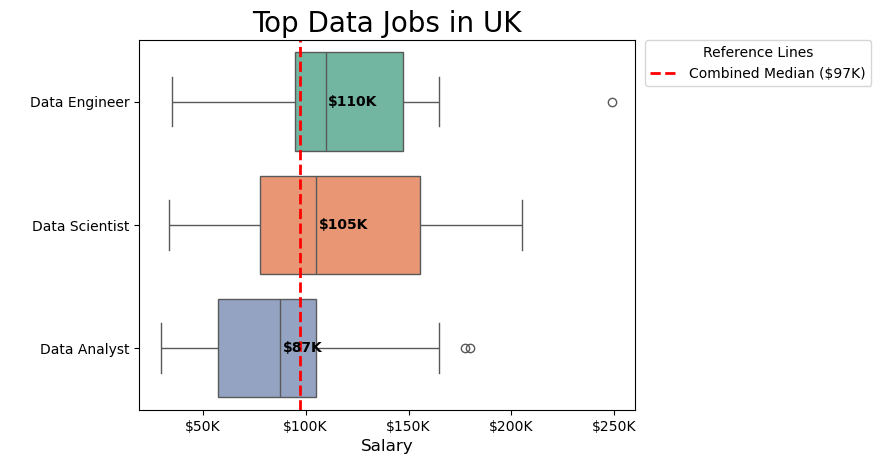

In [44]:
order = medians.index.tolist()

combined_median = df_UK_top_jobs["salary_year_avg"].median()

sns.boxplot( 
    data=df_UK_top_jobs,
    x="salary_year_avg",
    y="job_title_short",
    order= order,
    palette="Set2"  
)

#Calculate medians
medians = (
    df_UK_top_jobs.groupby("job_title_short")["salary_year_avg"]
    .median()
    .reindex(job_titles)
    .sort_values(ascending=False)
    
)

# Add labels
for i, (job, median) in enumerate(medians.items()):
    plt.text(
        median + 1000,        # move label a bit to the right
        i,                    # vertical position
        f"${int(median/1000)}K",
        va="center",
        fontweight="bold",
        color="black"
    )

# Format x-axis labels as $XXK
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

plt.title("Top Data Jobs in UK", fontsize= 20)

# Add combined median line
plt.axvline(
    combined_median,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Combined Median (${int(combined_median/1000)}K)"
)
# Add legend for the reference lines
plt.legend(
    title="Reference Lines",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0
)
plt.xlabel("Salary", fontsize = 12)
plt.ylabel(" ")
plt.show()